### Notebook creating a csv file with politician names and their corresponding US state

#### only a small selection of people - can add more later

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Files with congress people in them (2015 - present)
congress_114 = pd.read_csv("data/term-114.csv")
congress_115 = pd.read_csv("data/term-115.csv")
congress_116 = pd.read_csv("data/term-116.csv")

In [4]:
#only current senators
senators = pd.read_csv("data/us_senators.csv")

In [5]:
congress_114['area'] = congress_114['area'].str.split("'")
congress_115['area'] = congress_115['area'].str.split("'")
congress_116['area'] = congress_116['area'].str.split("'")

In [6]:
congress_114['area'] = congress_114['area'].str[0]
congress_115['area'] = congress_115['area'].str[0]
congress_116['area'] = congress_116['area'].str[0]

In [7]:
congress = pd.concat([congress_114, congress_115, congress_116])

In [8]:
congress.name.value_counts()

Marcy Kaptur           3
Sam Graves             3
Rob Woodall            3
Mario Diaz-Balart      3
Grace F. Napolitano    3
                      ..
Mark E. Green          1
Steve Israel           1
Ed Whitfield           1
Debra A. Haaland       1
Guy Reschenthaler      1
Name: name, Length: 603, dtype: int64

In [9]:
congress = congress.drop_duplicates(subset=['name'])
congress.shape

(603, 19)

In [10]:
congress.head()

,id,name,sort_name,email,twitter,facebook,group,group_id,area_id,area,chamber,term,start_date,end_date,image,gender,wikidata,wikidata_group,wikidata_area
0,cfc9cc09-a33a-42d9-89c3-14effb20b8b0,Aaron Schock,"Schock, Aaron",NaN,AaronSchock,RepAaronSchock,Republican,republican,IL-18,Illinois,House of Representatives,114,NaN,2015-03-31,https://theunitedstates.io/images/congress/ori...,male,Q302659,Q29468,Q3032529
1,e0b61cab-a183-4a44-bb0a-81f25fda8de3,Adam B. Schiff,"Schiff, Adam",NaN,RepAdamSchiff,RepAdamSchiff,Democrat,democrat,CA-28,California,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q350843,Q29552,Q5020000
2,159bbcc4-afee-4a5d-9097-e2be4d8ca9c7,Adam Kinzinger,"Kinzinger, Adam",NaN,RepKinzinger,RepKinzinger,Republican,republican,IL-16,Illinois,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q349955,Q29468,Q3477977
3,fed6fe02-7935-4711-a190-fed9abd0a5ae,Adam Smith,"Smith, Adam",NaN,RepAdamSmith,RepAdamSmith,Democrat,democrat,WA-9,Washington,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q350916,Q29552,Q7971571
4,4eb41831-ea19-4833-86f9-6f6c3ba72451,Adrian Smith,"Smith, Adrian",NaN,RepAdrianSmith,NaN,Republican,republican,NE-3,Nebraska,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q373443,Q29468,Q6984664


In [11]:
names = congress.name

In [12]:
sen_names = senators.Senator

In [14]:
congress.columns

Index(['id', 'name', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'area', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area'],
      dtype='object')

**First, let's compare the distribution of speakers for Republican and Democrats.**

In [15]:
#keep group to compare Republican and Democrats
congress_demo_rep= congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area'])

congress_demo_rep = congress_demo_rep.rename(columns={"area": "state", "name": "speaker"})

In [16]:
congress_demo_rep.group.value_counts()

Republican     318
Democrat       284
Independent      1
Name: group, dtype: int64

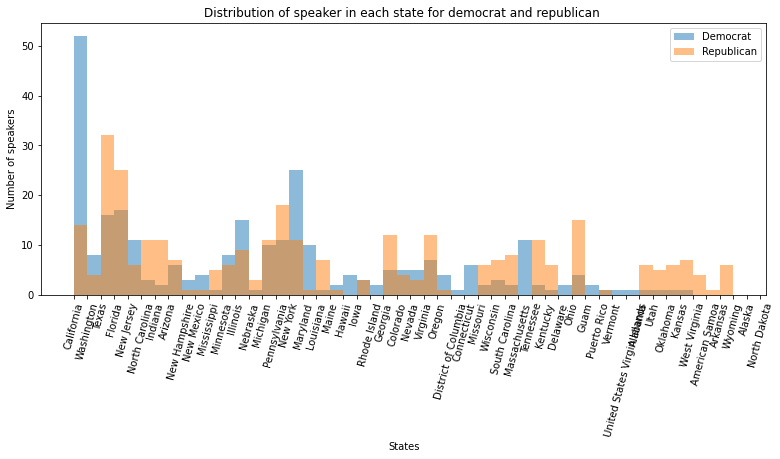

In [17]:
plt.figure(figsize=(13,5))
plt.hist(congress_demo_rep[congress_demo_rep['group']=='Democrat'].state, alpha=0.5, label='Democrat', bins = np.arange(50))
plt.hist(congress_demo_rep[congress_demo_rep['group']=='Republican'].state, alpha=0.5,label='Republican', bins = np.arange(50))
plt.legend(loc='upper right')
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state for democrat and republican ')
plt.xticks(rotation = 75)
plt.show()

This histogram shows the distribution of speaker in each state depending on their political group, either democrat or republican. We can see that in California, democrats are much more present than republicans. Same in New-York.
Indeed, California autorizes since june 2013 gay wedding thanks to the Supreme Court. In New-York, it is the case since 2011. It has been the case for all states in june 2015. 

**Let's compare the speaker by gender**

In [18]:
congress_gender= congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'wikidata', 'wikidata_group',
       'wikidata_area'])

congress_gender = congress_gender.rename(columns={"area": "state", "name": "speaker"})

In [19]:
congress_gender.gender.value_counts()

male      466
female    137
Name: gender, dtype: int64

We can see that there are much more male speakers. It is not surprising as male tend to be much more represented in politics.

In [12]:
congressdropped = congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area'])

In [13]:
senators.columns

Index(['State', 'Portrait', 'Senator', 'Party', 'Party.1', 'Born',
       'Occupation(s)', 'Previous electiveoffice(s)', 'Education',
       'Assumed office', 'Term up', 'Residence'],
      dtype='object')

In [14]:
congressdropped = congressdropped.rename(columns={"area": "state", "name": "speaker"})
congressdropped

,speaker,state
0,Aaron Schock,Illinois
1,Adam B. Schiff,California
2,Adam Kinzinger,Illinois
3,Adam Smith,Washington
4,Adrian Smith,Nebraska
...,...,...
424,Van Taylor,Texas
426,Veronica Escobar,Texas
430,W. Gregory Steube,Florida
435,William R. Timmons IV,South Carolina


In [15]:
senatorsdropped = senators.drop(columns = ['Portrait', 'Party', 'Party.1', 'Born',
       'Occupation(s)', 'Previous electiveoffice(s)', 'Education',
       'Assumed office', 'Term up', 'Residence'])

In [16]:
senatorsdropped = senatorsdropped.rename(columns = {'State': 'state', 'Senator': 'speaker'})
senatorsdropped

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
95,West Virginia,Shelley Moore Capito
96,Wisconsin,Ron Johnson
97,Wisconsin,Tammy Baldwin
98,Wyoming,John Barrasso


In [17]:
sen_con = pd.concat([senatorsdropped, congressdropped])
sen_con = sen_con.drop_duplicates(subset=['speaker'])

In [21]:
sen_con.to_csv("politicians.csv", index = False)

In [19]:
sen_con

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
424,Texas,Van Taylor
426,Texas,Veronica Escobar
430,Florida,W. Gregory Steube
435,South Carolina,William R. Timmons IV
